## Markov Weather Model with Time-Dependent Transitions

In [2]:
import numpy as np
import pandas as pd

# Define the 8-hour transition matrices
P_A = np.array([
    [0.3, 0.4, 0.3],
    [0.2, 0.5, 0.3],
    [0.1, 0.5, 0.4]
])

P_B = np.array([
    [0.2, 0.6, 0.2],
    [0.1, 0.3, 0.6],
    [0.3, 0.3, 0.4]
])

P_C = np.array([
    [0.1, 0.7, 0.2],
    [0.4, 0.2, 0.4],
    [0.3, 0.1, 0.6]
])

# Organize matrices and time sequence
transition_matrices = {'A': P_A, 'B': P_B, 'C': P_C}
time_order = {'A': 'B', 'B': 'C', 'C': 'A'}

# Define state labels
weather_states = ['E', 'C', 'R']
time_states = ['A', 'B', 'C']
state_names = [f'({w},{t})' for t in time_states for w in weather_states]

# Initialize 9x9 transition matrix
P_Z = np.zeros((9, 9))

# Fill the matrix
for i, curr_t in enumerate(time_states):
    for j, curr_w in enumerate(weather_states):
        state_idx = i * 3 + j  # Current state index
        next_t = time_order[curr_t]
        P = transition_matrices[curr_t]
        for k, next_w in enumerate(weather_states):
            next_state_idx = time_states.index(next_t) * 3 + k
            P_Z[state_idx, next_state_idx] = P[j, k]

# Convert to DataFrame for visualization
P_Z_df = pd.DataFrame(P_Z, index=state_names, columns=state_names)

# Display result
print("Transition Matrix P_Z:")
print(P_Z_df.round(2))


Transition Matrix P_Z:
       (E,A)  (C,A)  (R,A)  (E,B)  (C,B)  (R,B)  (E,C)  (C,C)  (R,C)
(E,A)    0.0    0.0    0.0    0.3    0.4    0.3    0.0    0.0    0.0
(C,A)    0.0    0.0    0.0    0.2    0.5    0.3    0.0    0.0    0.0
(R,A)    0.0    0.0    0.0    0.1    0.5    0.4    0.0    0.0    0.0
(E,B)    0.0    0.0    0.0    0.0    0.0    0.0    0.2    0.6    0.2
(C,B)    0.0    0.0    0.0    0.0    0.0    0.0    0.1    0.3    0.6
(R,B)    0.0    0.0    0.0    0.0    0.0    0.0    0.3    0.3    0.4
(E,C)    0.1    0.7    0.2    0.0    0.0    0.0    0.0    0.0    0.0
(C,C)    0.4    0.2    0.4    0.0    0.0    0.0    0.0    0.0    0.0
(R,C)    0.3    0.1    0.6    0.0    0.0    0.0    0.0    0.0    0.0


## Graph Visualization

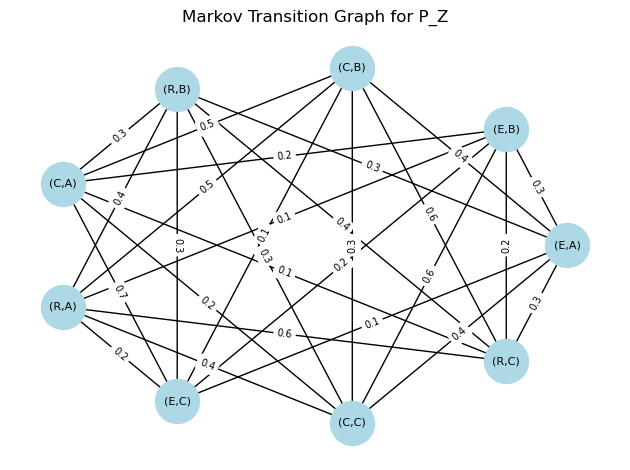

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add edges with weights (only if probability > 0)
for i, from_state in enumerate(state_names):
    for j, to_state in enumerate(state_names):
        prob = P_Z[i, j]
        if prob > 0:
            G.add_edge(from_state, to_state, weight=round(prob, 2))

# Position nodes in a circular layout
pos = nx.circular_layout(G)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=8)

# Draw edges and edge labels (weights)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

# Display the plot
plt.title("Markov Transition Graph for P_Z")
plt.axis('off')
plt.tight_layout()
plt.show()